# PCA on the Auto Claim data

The objective of this is to perform PCA using raw code and compare against sklearn PCA algo. Post that reduce the dimension to k dimension and perform Logistic regression and find the accurracy of the model with PCA and without PCA

### Step 1: Import data set and perform data transformations

In [1]:
# import all the libs for Prediction
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [25]:
df_train=pd.read_csv('Auto_claim_train.csv')
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [26]:
# perform EDA on Training data set

#df_train.loc[df_train['area_cluster'] == 'C1', 'area_cluster'] = '0' 
#data.loc[data['ExerciseAngina'] == 'Y', 'ExerciseAngina'] = '1' 

df_train.loc[df_train['area_cluster'] =='C1', 'area_cluster'] ='0'
df_train.loc[df_train['area_cluster'] =='C2', 'area_cluster'] ='1'
df_train.loc[df_train['area_cluster'] =='C3', 'area_cluster'] ='2'
df_train.loc[df_train['area_cluster'] =='C4', 'area_cluster'] ='3'
df_train.loc[df_train['area_cluster'] =='C5', 'area_cluster'] ='4'
df_train.loc[df_train['area_cluster'] =='C6', 'area_cluster'] ='5'
df_train.loc[df_train['area_cluster'] =='C7', 'area_cluster'] ='6'
df_train.loc[df_train['area_cluster'] =='C8', 'area_cluster'] ='7'
df_train.loc[df_train['area_cluster'] =='C9', 'area_cluster'] ='8'
df_train.loc[df_train['area_cluster'] =='C10', 'area_cluster'] ='9'
df_train.loc[df_train['area_cluster'] =='C11', 'area_cluster'] ='10'
df_train.loc[df_train['area_cluster'] =='C12', 'area_cluster'] ='11'
df_train.loc[df_train['area_cluster'] =='C13', 'area_cluster'] ='12'
df_train.loc[df_train['area_cluster'] =='C14', 'area_cluster'] ='13'
df_train.loc[df_train['area_cluster'] =='C15', 'area_cluster'] ='14'
df_train.loc[df_train['area_cluster'] =='C16', 'area_cluster'] ='15'
df_train.loc[df_train['area_cluster'] =='C17', 'area_cluster'] ='16'
df_train.loc[df_train['area_cluster'] =='C18', 'area_cluster'] ='17'
df_train.loc[df_train['area_cluster'] =='C19', 'area_cluster'] ='18'
df_train.loc[df_train['area_cluster'] =='C20', 'area_cluster'] ='19'
df_train.loc[df_train['area_cluster'] =='C21', 'area_cluster'] ='20'
df_train.loc[df_train['area_cluster'] =='C22', 'area_cluster'] ='21'

df_train.loc[df_train['segment'] =='A', 'segment'] = 0
df_train.loc[df_train['segment'] =='C1', 'segment'] = 1
df_train.loc[df_train['segment'] =='C2', 'segment'] = 2
df_train.loc[df_train['segment'] =='B2', 'segment'] = 3
df_train.loc[df_train['segment'] =='B1', 'segment'] = 4
df_train.loc[df_train['segment'] =='Utility', 'segment'] = 5

df_train.loc[df_train['is_parking_sensors'] =='No', 'is_parking_sensors'] = 0
df_train.loc[df_train['is_parking_sensors'] =='Yes', 'is_parking_sensors'] = 1

df_train.loc[df_train['is_parking_camera'] =='No', 'is_parking_camera'] = 0
df_train.loc[df_train['is_parking_camera'] =='Yes', 'is_parking_camera'] = 1

df_train.loc[df_train['is_brake_assist'] =='No', 'is_brake_assist'] = 0
df_train.loc[df_train['is_brake_assist'] =='Yes', 'is_brake_assist'] = 1
df_train.loc[df_train['is_speed_alert'] =='No', 'is_speed_alert'] = 0
df_train.loc[df_train['is_speed_alert'] =='Yes', 'is_speed_alert'] = 1
df_train.loc[df_train['is_front_fog_lights'] =='No', 'is_front_fog_lights'] = 0
df_train.loc[df_train['is_front_fog_lights'] =='Yes', 'is_front_fog_lights'] = 1

df_train = df_train[['population_density','ncap_rating','is_brake_assist','is_speed_alert','is_front_fog_lights','policy_tenure','age_of_car','age_of_policyholder',
                     'area_cluster', 'segment','airbags','is_parking_sensors','is_parking_camera','is_claim']]

df_train = df_train.astype(float)

In [27]:
df_train.head()

,population_density,ncap_rating,is_brake_assist,is_speed_alert,is_front_fog_lights,policy_tenure,age_of_car,age_of_policyholder,area_cluster,segment,airbags,is_parking_sensors,is_parking_camera,is_claim
0,4990.0,0.0,0.0,1.0,0.0,0.515874,0.05,0.644231,0.0,0.0,2.0,1.0,0.0,0.0
1,27003.0,0.0,0.0,1.0,0.0,0.672619,0.02,0.375000,1.0,0.0,2.0,1.0,0.0,0.0
2,4076.0,0.0,0.0,1.0,0.0,0.841110,0.02,0.384615,2.0,0.0,2.0,1.0,0.0,0.0
3,21622.0,2.0,1.0,1.0,1.0,0.900277,0.11,0.432692,3.0,1.0,2.0,1.0,1.0,0.0
4,34738.0,2.0,0.0,1.0,0.0,0.596403,0.11,0.634615,4.0,0.0,2.0,0.0,1.0,0.0


In [28]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
ncap_rating,58592.0,1.759950,1.389576,0.000000,0.000000,2.000000,3.000000,5.000000
is_brake_assist,58592.0,0.549171,0.497581,0.000000,0.000000,1.000000,1.000000,1.000000
is_speed_alert,58592.0,0.993805,0.078467,0.000000,1.000000,1.000000,1.000000,1.000000
is_front_fog_lights,58592.0,0.579055,0.493715,0.000000,0.000000,1.000000,1.000000,1.000000
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
area_cluster,58592.0,6.672174,4.513651,0.000000,2.000000,7.000000,9.000000,21.000000
segment,58592.0,1.864965,1.417093,0.000000,0.000000,2.000000,3.000000,5.000000


In [29]:
df_train_X = df_train.drop('is_claim',axis=1)
X = df_train_X.to_numpy()
n_samples, n_features = X.shape

due to performance issue with raw code using sklear for to starndard the data


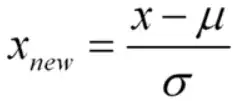

In [30]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(X_std[np.r_[0:5],:])

[[-0.78351301 -1.2665479  -1.10369092  0.07895573 -1.17286324 -0.23028345
  -0.34244685  1.42255728 -1.4782336  -1.31606109 -0.62045758  0.20545055
  -0.80065512]
 [ 0.46297453 -1.2665479  -1.10369092  0.07895573 -1.17286324  0.14818765
  -0.87135928 -0.7683621  -1.25668158 -1.31606109 -0.62045758  0.20545055
  -0.80065512]
 [-0.83526832 -1.2665479  -1.10369092  0.07895573 -1.17286324  0.55502223
  -0.87135928 -0.69011498 -1.03512955 -1.31606109 -0.62045758  0.20545055
  -0.80065512]
 [ 0.15827506  0.17275183  0.90605077  0.07895573  0.85261433  0.69788322
   0.71537802 -0.29887937 -0.81357752 -0.61038487 -0.62045758  0.20545055
   1.24897721]
 [ 0.9009694   0.17275183 -1.10369092  0.07895573 -1.17286324 -0.03584026
   0.71537802  1.34431017 -0.59202549 -1.31606109 -0.62045758 -4.86735126
   1.24897721]]


The formula to calculate the covariance matrix:

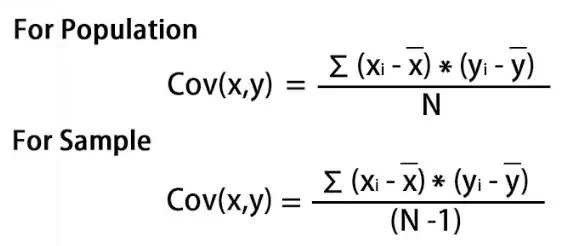

In [31]:
def covariance(x): 
    return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance(X_std) # np.cov(X_std.T)

print(cov_mat)

[[ 1.00001707 -0.07115144 -0.09182553 -0.00431585 -0.09185743 -0.1003083
  -0.06225599  0.00966902  0.0011252  -0.08083106 -0.06035961 -0.01034672
  -0.05106535]
 [-0.07115144  1.00001707  0.41843504 -0.18410433  0.51026072  0.17328274
   0.34885853 -0.03162824  0.08119927  0.38341489  0.34156251 -0.03549256
   0.47704415]
 [-0.09182553  0.41843504  1.00001707 -0.07153912  0.91581885  0.18468999
   0.35057364  0.0250253   0.09495172  0.47486522  0.58480448  0.22675778
   0.4099887 ]
 [-0.00431585 -0.18410433 -0.07153912  1.00001707  0.09260585 -0.01031785
  -0.04655193  0.00164318  0.00342147  0.04819421  0.04898952 -0.01622177
  -0.09861559]
 [-0.09185743  0.51026072  0.91581885  0.09260585  1.00001707  0.18929132
   0.34957588  0.01121952  0.09825346  0.44163571  0.55182605  0.24096951
   0.48880151]
 [-0.1003083   0.17328274  0.18468999 -0.01031785  0.18929132  1.00001707
   0.16631507  0.14367799  0.09398521  0.17272163  0.10398318 -0.01600734
   0.11161569]
 [-0.06225599  0.348858

An eigenvector is a nonzero vector that changes at most by a scalar factor when that linear transformation is applied to it. The corresponding eigenvalue is the factor by which the eigenvector is scaled.

Let A be a square matrix (in our case the covariance matrix), ν a vector and λ a scalar that satisfies Aν = λν, then λ is called eigenvalue associated with eigenvector ν of A.
Rearranging the above equation,

Aν-λν =0 ; (A-λI)ν = 0

Since we have already know ν is a non- zero vector, only way this equation can be equal to zero, if

det(A-λI) = 0

In [32]:
from numpy.linalg import eig

# Eigendecomposition of covariance matrix
eig_vals, eig_vecs = eig(cov_mat) 

# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [3.70843336 1.56153038 1.20072199 1.1209333  1.03231163 1.00124189
 0.91866236 0.75810403 0.64357217 0.52138626 0.39383175 0.12379917
 0.01569359]
Eigenvectors 
 [[-7.56039162e-02  3.54297846e-01  4.52117345e-01 -2.66105189e-02
   4.61988405e-01  1.53709844e-01  2.70009759e-01 -1.83252327e-03
   8.03066718e-02  2.70483848e-01  3.83286014e-01  8.38598282e-02
   3.46581775e-01]
 [ 5.38817078e-02  8.62771728e-02 -1.34847958e-01 -1.21334253e-01
  -1.13787412e-01 -9.13324661e-02 -7.79140483e-02 -7.02728487e-02
  -7.67317179e-02 -4.97935749e-01  2.94799973e-01 -5.29185388e-01
   5.51068967e-01]
 [-1.82018861e-01  2.55282705e-01 -1.47501365e-01 -3.38493563e-01
  -1.80234393e-01  4.92975140e-01  3.21751461e-01  2.07660509e-01
   2.68711795e-01  1.19698778e-01 -3.20612855e-01 -3.85998728e-01
  -6.99147111e-02]
 [-7.82388126e-02 -2.49013468e-01  2.66539432e-02  4.37838965e-01
   7.25558006e-02  3.80195701e-01 -2.25763058e-01  6.63335677e-01
   1.78213742e-01 -1.83252778e-01  1.7251

Next step is to order the (eigenvalue, eigenvector) in decending order

In [33]:
# We first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(3.708433363803299, array([-0.07560392,  0.35429785,  0.45211735, -0.02661052,  0.46198841,
        0.15370984,  0.27000976, -0.00183252,  0.08030667,  0.27048385,
        0.38328601,  0.08385983,  0.34658178])), (1.561530382694663, array([ 0.05388171,  0.08627717, -0.13484796, -0.12133425, -0.11378741,
       -0.09133247, -0.07791405, -0.07027285, -0.07673172, -0.49793575,
        0.29479997, -0.52918539,  0.55106897])), (1.2007219882357565, array([-0.18201886,  0.25528271, -0.14750136, -0.33849356, -0.18023439,
        0.49297514,  0.32175146,  0.20766051,  0.2687118 ,  0.11969878,
       -0.32061286, -0.38599873, -0.06991471])), (1.1209333000622705, array([-0.07823881, -0.24901347,  0.02665394,  0.43783896,  0.0725558 ,
        0.3801957 , -0.22576306,  0.66333568,  0.17821374, -0.18325278,
        0.17251133,  0.01178399,  0.05848552])), (1.0323116315164371, array([-0.42472741, -0.06269755, -0.0979247 ,  0.67480097,  0.01091973,
        0.04232331,  0.1872174 , -0.44078077,  0.052

In [36]:
# Select top k eigenvectors
k = 10
W = eig_vecs_sorted[:k, :] # Projection matrix

print(W.shape)

(10, 13)


Explained variance: [28.53 12.01  9.24  8.62  7.94  7.7   7.07  5.83  4.95  4.01  3.03  0.95
  0.12]
Cumulative explained variance: [ 28.53  40.54  49.78  58.4   66.34  74.04  81.11  86.94  91.89  95.9
  98.93  99.88 100.  ]


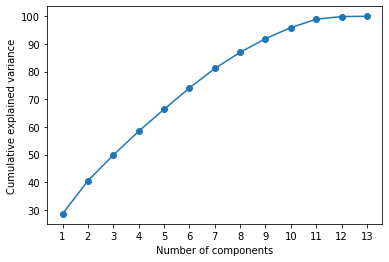

In [35]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

In [37]:
X_proj = X_std.dot(W.T)

print(X_proj.shape)

(58592, 10)


# PCA with Scikit-Learn 

In [42]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df_train)

from sklearn.decomposition import PCA
pca = PCA(n_components = 10).fit(X_std)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance:\n', cum_explained_variance)

X_pca = pca.transform(X_std) # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)


Components:
 [[-0.07565237  0.35427464  0.45210931 -0.02658519  0.4619819   0.15391594
   0.26991706 -0.00175673  0.08029512  0.27048671  0.38325695  0.08388069
   0.34654171  0.00758397]
 [ 0.05518712  0.08656659 -0.13442557 -0.12168303 -0.11343638 -0.09579718
  -0.07637473 -0.07273917 -0.07677221 -0.4970317   0.29482677 -0.52829126
   0.55076331 -0.03354724]
 [-0.19628282  0.2235731  -0.14226151 -0.29116813 -0.16989085  0.53971409
   0.27620857  0.26985953  0.26420629  0.09064155 -0.29174268 -0.3760673
  -0.05718307  0.1713774 ]
 [ 0.07283731  0.26881292 -0.04865488 -0.43513445 -0.09377182 -0.30507464
   0.29463928 -0.56143964 -0.06622766  0.2013052  -0.21806629 -0.08178608
  -0.07380709 -0.34962171]
 [ 0.38817035  0.0701102   0.09912945 -0.70023799 -0.01292716 -0.048654
  -0.19342897  0.40729174 -0.10569324 -0.11645123  0.03964156  0.32709498
   0.01241242  0.07045703]
 [-0.53334623  0.03831026  0.01270478 -0.20355343 -0.01605965  0.01518119
  -0.08130035 -0.20663697 -0.592628   -0.

In [44]:
print(X_pca[np.r_[0:5],:])

[[-2.53741266e+00  1.07605168e-01 -3.61920632e-02 -9.95573726e-01
   4.38115840e-01  8.58672485e-01 -1.60441162e+00 -5.66140209e-01
   4.53159662e-01  7.29189433e-01]
 [-2.69458375e+00  3.22890917e-01 -7.55385143e-01  3.93128695e-02
   9.00982858e-02  5.64036465e-01 -1.95360898e-01 -4.69122558e-01
  -1.22120335e+00  3.98415892e-01]
 [-2.51609818e+00  1.89570359e-01 -2.01336853e-01 -2.37966468e-01
  -4.25182376e-01  1.11515895e+00 -8.38023567e-01  2.29422796e-01
  -1.21616056e+00  4.31881975e-01]
 [ 1.13153963e+00  4.66852231e-01 -7.83346875e-02  1.13969183e-01
  -2.44994302e-04  2.88205945e-01 -2.97960775e-01 -8.07356891e-01
  -6.33861684e-01  4.72062122e-01]
 [-1.48341886e+00  3.97217863e+00  2.35562232e+00  1.52256106e-02
  -7.80565562e-01 -1.04644980e+00 -1.33920307e-01 -2.26823148e+00
   1.34512124e+00 -4.20310935e-01]]


#### From the above analysis we could conclude that the PCA with raw code vs Scikit-Learn gives the same result. 